In [0]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_union

In [0]:
url = 'https://raw.githubusercontent.com/micklwl/cs3244/master/dataset.csv'
train = pd.read_csv(url, sep=',')

train['id'] = np.arange(len(train))
train.head(100)

,Insult,Comment,id
0,1,you fuck your dad,0
1,0,i really do not understand your point it seem...,1
2,0,a majority of canadians can and has been wron...,2
3,0,listen if you dont wanna get married to a man ...,3
4,0,các bạn xuống đường biểu tình 2011 có ôn hoà k...,4
...,...,...,...
95,1,correction bitch you do not think its superb b...,95
96,1,i think the only trickle that effected you was...,96
97,1,and you keep on your knees and keep telling yo...,97
98,0,what was that like 2000 words about nothing yo...,98


In [0]:
from sklearn.model_selection import train_test_split

# Split the data
train, test = train_test_split(train, test_size=0.2, shuffle= True)

In [0]:
train_text = train['Comment']
test_text = test['Comment']

In [0]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=30000) 
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(1, 4),
    max_features=30000)
vectorizer = make_union(word_vectorizer, char_vectorizer, n_jobs=2)

# Cross-val score(old)


In [0]:
vectorizer.fit(train_text)
train_features = vectorizer.transform(train_text)
test_features = vectorizer.transform(test_text)

scores = []
submission = pd.DataFrame.from_dict({'id': test['id']})
train_target = train["Insult"]
classifier = LogisticRegression(solver='sag')

cv_score = np.mean(cross_val_score(
        classifier, train_features, train_target, cv=3, scoring='roc_auc'))
scores.append(cv_score)
print('CV score for class {} is {}'.format("Insult", cv_score))

classifier.fit(train_features, train_target)
submission["Insult"] = classifier.predict_proba(test_features)[:, 1]

print('Total CV score is {}'.format(np.mean(scores)))

In [0]:
submission

In [0]:
predicted = classifier.predict(test_features)
predicted

In [0]:
test_values = test["Insult"].values
test_values

In [0]:
from sklearn import metrics
print("Test accuracy: ", metrics.accuracy_score(test_values, predicted))

# Accuracy Score(Use)

In [0]:
vectorizer.fit(train_text)
train_features = vectorizer.transform(train_text)
test_features = vectorizer.transform(test_text)
classifier = LogisticRegression(C = 0.1,solver='sag')
train_target = train["Insult"]

In [0]:
classifier.fit(train_features, train_target)
predicted = classifier.predict(test_features)
predicted

array([0, 0, 0, 0, ..., 1, 0, 0, 0])

In [0]:
test_values = test["Insult"].values
test_values

array([0, 0, 0, 0, ..., 1, 0, 1, 0])

[[29645   219]
 [ 1891  1909]]
Test accuracy:  0.9373217680608364
Test precision:  0.8970864661654135
Test recall:  0.5023684210526316


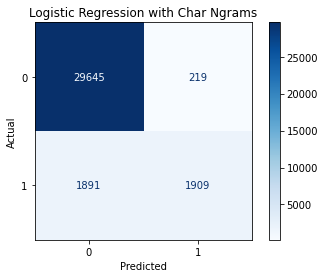

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(classifier, test_features,test_values,cmap=plt.cm.Blues,values_format = 'd') #test_values is true values, test_features is the input to be given to be tested, classifier is model name
disp.ax_.set_title("Logistic Regression with Char Ngrams")
disp.ax_.set_xlabel("Predicted")
disp.ax_.set_ylabel("Actual")


print(disp.confusion_matrix)
print("Test accuracy: ", metrics.accuracy_score(test_values, predicted))
print("Test precision: ", metrics.precision_score(test_values, predicted))
print("Test recall: ", metrics.recall_score(test_values, predicted))

In [0]:
tn, fp, fn, tp = disp.confusion_matrix.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  29634
False Positives:  195
False Negatives:  1925
True Positives:  1910


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


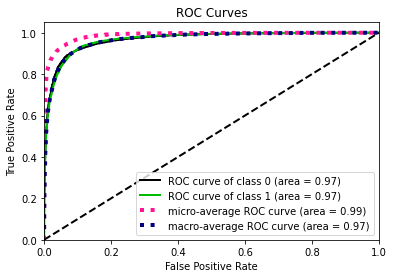

In [0]:
!pip install scikit-plot
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba = classifier.predict_proba(test_features) #test_values is true values, test_features is the input to be given to be tested, classifier is model name
skplt.metrics.plot_roc_curve(test_values, y_pred_proba)
plt.show()

Using SG dataset





In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
url = '../content/gdrive/My Drive/Local Data - Sheet1.csv'
df = pd.read_csv(url, sep =',')
df

,Insult,Comment
0,0,Sad truth is there are more hot girls than suc...
1,1,"To the author, you should just contract covid ..."
2,0,Aiyo it's just diff cultures la..china men are...
3,0,Korean oppa seem to cry alot too. Maybe he tho...
4,0,Guess all the mid range height population are ...
...,...,...
295,0,Yes. You will need to wear a mask.
296,1,"Kbkb, erection still retain power. You guys re..."
297,1,TS don't need brain if not using right?
298,1,Circuit breaker really accelerate their mental...


In [0]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os
!pip install unidecode
import unidecode

df.drop_duplicates(inplace = True)

df["Comment"] = df["Comment"].str.decode('unicode_escape')

df["Comment"] = df["Comment"].str.replace(r"\\n", " ")

#Strip quotation marks, lowercase all
df["Comment"] = df["Comment"].str.strip('"').str.lower()

#Convert contractions
df["Comment"] = df["Comment"].str.replace("can't","can not")
df["Comment"] = df["Comment"].str.replace("you're","you are")
df["Comment"] = df["Comment"].str.replace("don't","do not")
df["Comment"] = df["Comment"].str.replace("i'm","i am")

#Remove punctuation and leftover encoding
df["Comment"] = df["Comment"].str.replace(r'\\xa0', ' ')
df["Comment"] = df["Comment"].str.replace(r'\\xc2', ' ')
df["Comment"] = df["Comment"].str.replace('[^\w\s]','')

#Keep only alphabets
df["Comment"] = df["Comment"].str.replace("[^a-zA-Z]", " ")

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

# tokenization 
tokenized_doc = df['Comment'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 

df['Comment'] = detokenized_doc

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
train_df, test_df = train_test_split(df, test_size=0.2, shuffle= True)

Predict without training

In [0]:
test_values = test_df["Insult"].values #actual
test_comments = test_df["Comment"]
test_vectors = vectorizer.transform(test_comments)
predicted = classifier.predict(test_vectors) #predicted
predicted

array([0, 0, 0, 0, ..., 0, 0, 0, 0])

[[37  0]
 [22  1]]
Test accuracy:  0.6333333333333333
Test precision:  1.0
Test recall:  0.043478260869565216


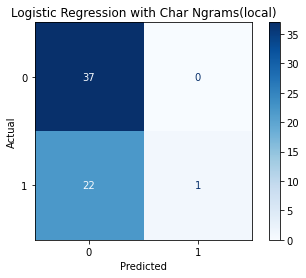

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(classifier, test_vectors,test_values,cmap=plt.cm.Blues,values_format = 'd') #test_values is true values, test_features is the input to be given to be tested, classifier is model name
disp.ax_.set_title("Logistic Regression with Char Ngrams(local)")
disp.ax_.set_xlabel("Predicted")
disp.ax_.set_ylabel("Actual")


print(disp.confusion_matrix)
print("Test accuracy: ", metrics.accuracy_score(test_values, predicted))
print("Test precision: ", metrics.precision_score(test_values, predicted))
print("Test recall: ", metrics.recall_score(test_values, predicted))

For domain adaptation

In [0]:
train_text_2 = train_df['Comment']
test_text_2 = test_df['Comment']
vectorizer.fit(train_text_2)
train_features_2 = vectorizer.transform(train_text_2)
test_features_2 = vectorizer.transform(test_text_2)
train_target_2 = train_df["Insult"]
classifier.fit(train_features_2, train_target_2)
predicted = classifier.predict(test_features_2)
predicted

array([0, 0, 0, 0, ..., 0, 0, 0, 0])

In [0]:
test_values_2 = test_df["Insult"].values
test_values_2

array([1, 0, 0, 0, ..., 1, 0, 1, 1])

[[30  7]
 [18  5]]
Test accuracy:  0.5833333333333334
Test precision:  0.4166666666666667
Test recall:  0.21739130434782608


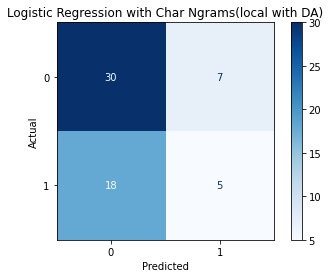

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(classifier, test_features_2,test_values_2,cmap=plt.cm.Blues,values_format = 'd') #test_values is true values, test_features is the input to be given to be tested, classifier is model name
disp.ax_.set_title("Logistic Regression with Char Ngrams(local with DA)")
disp.ax_.set_xlabel("Predicted")
disp.ax_.set_ylabel("Actual")


print(disp.confusion_matrix)
print("Test accuracy: ", metrics.accuracy_score(test_values_2, predicted))
print("Test precision: ", metrics.precision_score(test_values_2, predicted))
print("Test recall: ", metrics.recall_score(test_values_2, predicted))